In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
%load_ext autoreload
%autoreload 2
%run '../main.py'

In [3]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2010, 2017)

dataSetOps.prepare()


df = dataSetOps.df

In [4]:
# variables
mavgl = 50
window = 15
epilson = 0.0001

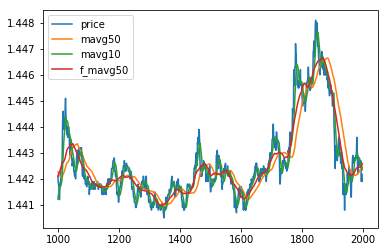

In [5]:
mavgl = str(mavgl)
df['f_mavg' + mavgl] = df['mavg' + mavgl].shift(-window)
df['f_price'] = df['price'].shift(-window)
df['value'] = df['f_mavg' + mavgl] - df['mavg' + mavgl] > epilson
df[['price', 'mavg' + mavgl, 'mavg10', 'f_mavg' + mavgl]].head(1000).plot()

0.3211868335967236


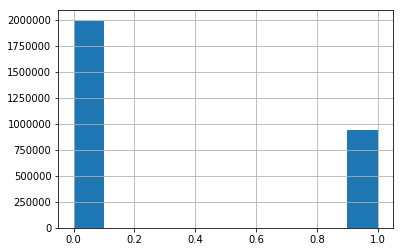

In [6]:
df['value'].astype(int).hist()
print(len(df[df['value']]) / (len(df)))

In [7]:
X = df[['price', 'mavg10', 'mavg20', 'mavg100', 'mavg1000']]
Y = df['value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

    
#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 5))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
from keras import metrics
metric_names = [metrics.mae, 'accuracy']
classifier.compile(optimizer='adam', loss = 'mean_squared_error', metrics=metric_names)

# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 20, epochs = 300)
import random
classifier.save("/tmp/mavg_classifier_" + str(random.randint(100000, 999999)))

Using TensorFlow backend.
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=5, units=16, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  del sys.path[0]
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Epoch 1/300
2641896/2641896 [==============================] - 52s 20us/step - loss: 0.1639 - mean_absolute_error: 0.3264 - acc: 0.7654
Epoch 2/300
2641896/2641896 [==============================] - 53s 20us/step - loss: 0.1385 - mean_absolute_error: 0.2710 - acc: 0.8059
Epoch 3/300
2641896/2641896 [==============================] - 52s 20us/step - loss: 0.1350 - mean_absolute_error: 0.2644 - acc: 0.8114
Epoch 4/300
2641896/2641896 [==============================] - 52s 20us/step - loss: 0.1328 - mean_absolute_error: 0.2598 - acc: 0.8148
Epoch 5/300
2641896/2641896 [==============================] - 53s 20us/step - loss: 0.1313 - mean_absolute_error: 0.2566 - acc: 0.8171
Epoch 6/300
2641896/2641896 [==============================] - 52s 20us/step - loss: 0.1300 - mean_absolute_error: 0.2540 - acc: 0.8189
Epoch 7/300
2641896/2641896 [==============================] - 53s 20us/step - loss: 0.1290 - mean_absolute_error: 0.2520 - acc: 0.8206
Epoch 8/300
2641896/2641896 [===================

2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1195 - mean_absolute_error: 0.2386 - acc: 0.8342
Epoch 61/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1194 - mean_absolute_error: 0.2384 - acc: 0.8345
Epoch 62/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1194 - mean_absolute_error: 0.2383 - acc: 0.8345
Epoch 63/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1194 - mean_absolute_error: 0.2383 - acc: 0.8345
Epoch 64/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1193 - mean_absolute_error: 0.2382 - acc: 0.8344
Epoch 65/300
2641896/2641896 [==============================] - 52s 19us/step - loss: 0.1193 - mean_absolute_error: 0.2383 - acc: 0.8345
Epoch 66/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1193 - mean_absolute_error: 0.2382 - acc: 0.8346
Epoch 67/300
2641896/2641896 [========================

2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1179 - mean_absolute_error: 0.2355 - acc: 0.8367
Epoch 120/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1179 - mean_absolute_error: 0.2355 - acc: 0.8366
Epoch 121/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1179 - mean_absolute_error: 0.2354 - acc: 0.8366
Epoch 122/300
2641896/2641896 [==============================] - 52s 20us/step - loss: 0.1179 - mean_absolute_error: 0.2355 - acc: 0.8365
Epoch 123/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1179 - mean_absolute_error: 0.2355 - acc: 0.8368
Epoch 124/300
2641896/2641896 [==============================] - 52s 20us/step - loss: 0.1178 - mean_absolute_error: 0.2353 - acc: 0.8370
Epoch 125/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1178 - mean_absolute_error: 0.2352 - acc: 0.8369
Epoch 126/300
2641896/2641896 [=================

2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1172 - mean_absolute_error: 0.2339 - acc: 0.8378
Epoch 179/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1173 - mean_absolute_error: 0.2341 - acc: 0.8375
Epoch 180/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1172 - mean_absolute_error: 0.2339 - acc: 0.8375
Epoch 181/300
2641896/2641896 [==============================] - 52s 20us/step - loss: 0.1172 - mean_absolute_error: 0.2339 - acc: 0.8377
Epoch 182/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1172 - mean_absolute_error: 0.2339 - acc: 0.8377
Epoch 183/300
2641896/2641896 [==============================] - 52s 20us/step - loss: 0.1172 - mean_absolute_error: 0.2339 - acc: 0.8377
Epoch 184/300
2641896/2641896 [==============================] - 52s 19us/step - loss: 0.1172 - mean_absolute_error: 0.2339 - acc: 0.8377
Epoch 185/300
2641896/2641896 [=================

2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1168 - mean_absolute_error: 0.2330 - acc: 0.8385
Epoch 238/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1168 - mean_absolute_error: 0.2331 - acc: 0.8382
Epoch 239/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1168 - mean_absolute_error: 0.2331 - acc: 0.8382
Epoch 240/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1168 - mean_absolute_error: 0.2330 - acc: 0.8382
Epoch 241/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1168 - mean_absolute_error: 0.2330 - acc: 0.8383
Epoch 242/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1168 - mean_absolute_error: 0.2329 - acc: 0.8383
Epoch 243/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1168 - mean_absolute_error: 0.2330 - acc: 0.8383
Epoch 244/300
2641896/2641896 [=================

2641896/2641896 [==============================] - 52s 20us/step - loss: 0.1165 - mean_absolute_error: 0.2325 - acc: 0.8387
Epoch 297/300
2641896/2641896 [==============================] - 52s 20us/step - loss: 0.1165 - mean_absolute_error: 0.2325 - acc: 0.8389
Epoch 298/300
2641896/2641896 [==============================] - 52s 20us/step - loss: 0.1165 - mean_absolute_error: 0.2325 - acc: 0.8386
Epoch 299/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1165 - mean_absolute_error: 0.2325 - acc: 0.8386
Epoch 300/300
2641896/2641896 [==============================] - 51s 19us/step - loss: 0.1165 - mean_absolute_error: 0.2325 - acc: 0.8389


In [9]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
from lib.helper import AccuracyCalculator

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, (y_pred > 0.8))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_pred[:,0], y_test, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_pred[:,0], y_test)


class_accuracy => accuracy:  0.6944434986560231 risk:  0.09326266913678681
optimistic_accuracy => risk:  0.01 min pass point:  0.9777232


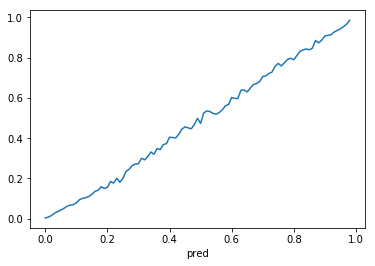

In [10]:
(1-risk_hist_df.risk).plot()

In [11]:
cm

array([[195001,   3977],
       [ 55901,  38666]])

In [12]:
import random
random.randint(1,101)

35